
houseprice.csv는 주택판매가격(price)과 이에 영향을 줄 것으로 판단되는 4가지 설명변수인 세금(tax; 만원), 대지평수(ground; 평), 건물평수(floor; 평), 주택연령(year; 년)을 27개 주택에 대해 조사한 것이다. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence

data_path = "../../data/"
house = pd.read_csv(data_path + "houseprice.csv")

1\.	5개 변수들에 대한 산점도 행렬을 작성하고 변수들 간의 관계를 설명하여라. 

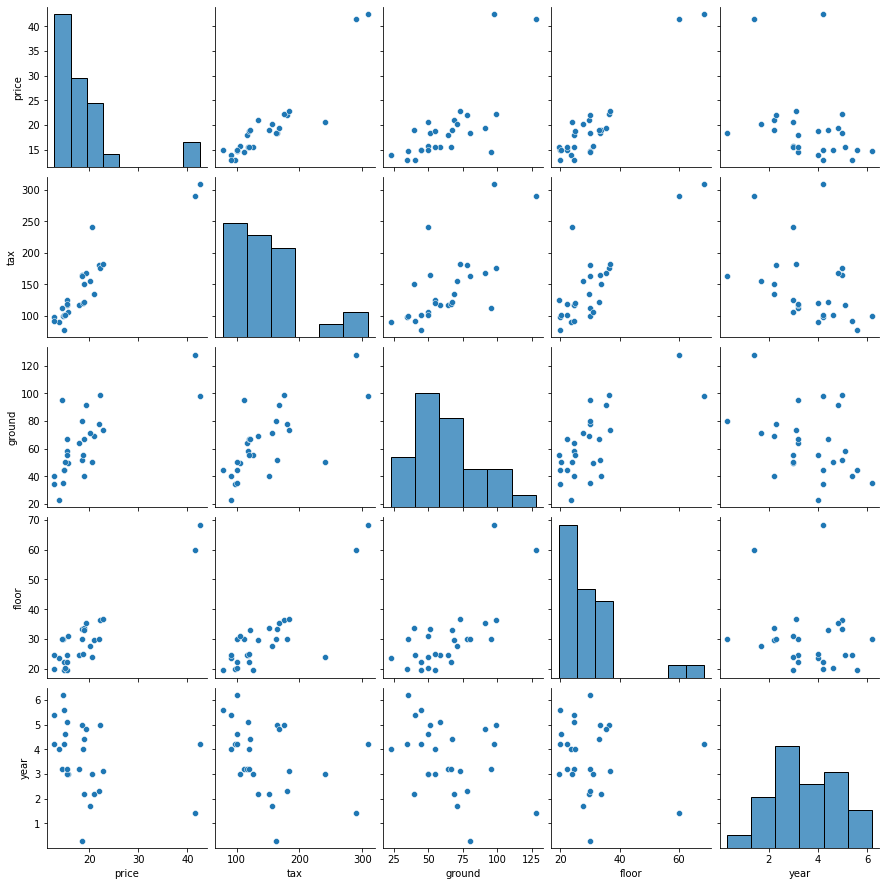

In [2]:
sns.pairplot(house)

In [3]:
# 대부분 양의 상관관계를 보이지만, year는 다른 변수와 음의 상관관계를 보인다.

2\. 주택 판매가격을 종속변수로, 나머지 4개 변수를 설명변수로 하는 선형회귀모형을 적합하여라. 

In [4]:
model = smf.ols('price~tax+ground+floor+year', data=house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     74.53
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.82e-12
Time:                        00:06:11   Log-Likelihood:                -54.781
No. Observations:                  27   AIC:                             119.6
Df Residuals:                      22   BIC:                             126.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2187      2.047      0.595      0.558      -3.026       5.463
tax            0.0519      0.014      3.756      0.001       0.023       0.081
ground         0.0116      0.025      0.458      0.652      -0.041       0.064
floor          0.3494      0.073      4.807      0.000       0.199       0.500
year          -0.2189      0.331     -0.660      0.516      -0.906       0.469
==============================================================================
Omnibus:                        0.837   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.737
Skew:                           0.014   Prob(JB):                        0.692
Kurtosis:                       2.191   Cond. No.                         903.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# 스케일링
from sklearn.preprocessing import StandardScaler
house_s = StandardScaler().fit_transform(house.iloc[:,1:])
house_s = pd.DataFrame(house_s, columns = house.columns[1:])
house_s.describe()

,tax,ground,floor,year
count,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01
mean,8.223874e-18,1.685894e-16,-3.988579e-16,4.913765e-16
std,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00
min,-1.185914e+00,-1.726578e+00,-9.803674e-01,-2.427880e+00
25%,-7.301389e-01,-6.893098e-01,-5.924729e-01,-4.699990e-01
50%,-4.072774e-01,-2.109409e-01,-4.394447e-02,2.551423e-01
75%,3.743119e-01,5.153354e-01,2.663711e-01,7.627412e-01
max,2.890676e+00,2.735542e+00,3.482701e+00,1.850453e+00


In [6]:
house_s['price'] = house['price']
model_s = smf.ols('price~tax+ground+floor+year', data=house_s).fit()
model_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     74.53
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.82e-12
Time:                        00:06:11   Log-Likelihood:                -54.781
No. Observations:                  27   AIC:                             119.6
Df Residuals:                      22   BIC:                             126.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.2500      0.392     49.061      0.000      18.436      20.064
tax            2.9384      0.782      3.756      0.001       1.316       4.561
ground         0.2735      0.598      0.458      0.652      -0.966       1.513
floor          3.8283      0.796      4.807      0.000       2.177       5.480
year          -0.3019      0.457     -0.660      0.516      -1.250       0.646
==============================================================================
Omnibus:                        0.837   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.737
Skew:                           0.014   Prob(JB):                        0.692
Kurtosis:                       2.191   Cond. No.                         4.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3\.	결정계수는 얼마인가? 주택 판매가격에 유의한 영향을 주는 변수들은 무엇인가?

In [7]:
# 결정계수 = 0.931
# 유의수준 0.05 하에서 price를 결정하는데에 tax와 floor는 통계적으로 유의하지만, 나머지는 유의하지 않음
# (tax가 1 증가하면 price가 0.0519 증가함, floor가 1 증가할수록 price가 0.3494 증가)

4\. 회귀진단을 위한 그래프들을 그리고 모형이 적절한지 판단하여라. Influential point가 있는가? 이들을 제외하면 회귀분석 결과에 영향을 줄 것으로 예상되는가? 

In [8]:
inf = OLSInfluence(model)

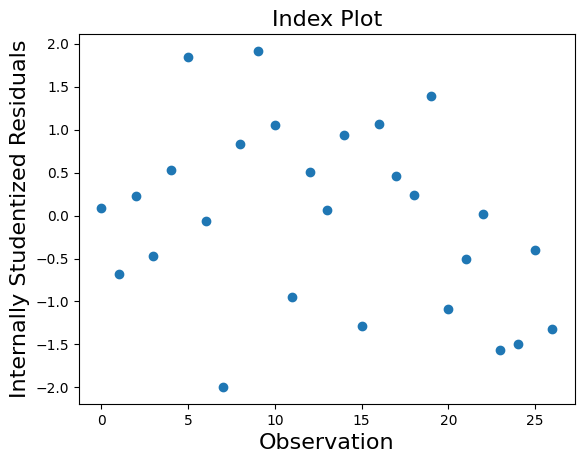

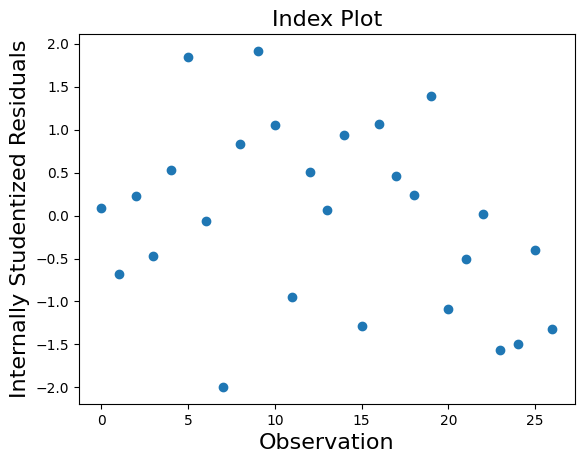

In [9]:
inf.plot_index('resid',threshold=3)

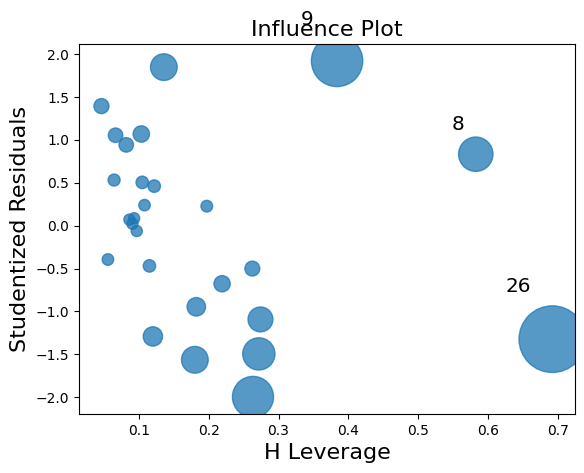

In [10]:
inf.plot_influence()
plt.show()

In [11]:
# 영향치 9, 8, 26 => 회귀분석 결과에 영향을 줄 수 있다

5\.	세금이 150만원, 대지평수가 50평, 건물평수가 30평, 주택연령이 3년인 주택의 평균판매가격에 대한 추정값과 90% 신뢰구간을 구하여라. 

In [12]:
pred = model.get_prediction(exog = dict(tax=150, ground=50, floor=30, year=3))
pred.summary_frame(alpha = 0.1)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,19.41629,0.595931,18.392991,20.439589,15.768865,23.063714


In [13]:
# 평균판매가격 = 19.41629
# 신뢰구간 = 18.392991 ~ 20.439589